# Imports

In [1]:
import os
import sys
sys.path.append(os.path.sep.join(os.getcwd().split(sep=os.path.sep)[:-1]))

import PlotTools

import seaborn as sns
import matplotlib.pyplot as plt
import random

random.seed(1)

In [2]:
import importlib
importlib.reload(PlotTools)

<module 'PlotTools' from 'D:\\Liel\\Dropbox\\PyCharm\\PycharmProjectsNew\\LielTools_4\\LielTools\\PlotTools.py'>

# Load data

In [3]:
iris_df = sns.load_dataset('iris')
# make some missing values
to_none = random.sample(range(0,150), 50)
iris_df.loc[to_none, 'sepal_width'] = None
iris_df.loc[to_none, 'petal_width'] = None

# show df
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,NaN,1.4,NaN,setosa
1,4.9,NaN,1.4,NaN,setosa
2,4.7,NaN,1.3,NaN,setosa
3,4.6,NaN,1.5,NaN,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,NaN,5.2,NaN,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
diam_df = sns.load_dataset('diamonds')
diam_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
peng_df = sns.load_dataset('penguins')
peng_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# Parallel coordinates plots

##### Consider that in parallel coordinates plots, the order of the variables has gread affect over the appearance of the plot and data.

### spaghetti_patients function

In [6]:
help(PlotTools.spaghetti_patients)

Help on function spaghetti_patients in module PlotTools:

spaghetti_patients(patientDf, classColumn=None, figsize=(6, 8), linewidth=1, alpha=0.9, rotationXlabels=90, plotTitle=None, xTitle=None, yTitle=None, ylim=None, showLegend=True, saveFullPath=None, marker='', markersize=2, legend_title='', shuffle_colors=True, cmap=None)
    Gets a df. Creates a spaghetti plot with each row getting a line,
    and each column getting an x-axis point.
    
    @ patientDf: This is the only obligatory variable.
            Must contain all numeric columns (except for "classColumn")
    @ classColumn: string. Not obligatory. The name of a column of "class"
        values (can be strings / numeric column).
        Each row will be colored according to classColumn's values.
        (This column will not be used for an x-axis point)
        If classColumn=None, each row will get a different color.
    @ showLegend -  will work only if "classColumn" is given.
    @ alpha - transparency.
    @ showFig = 

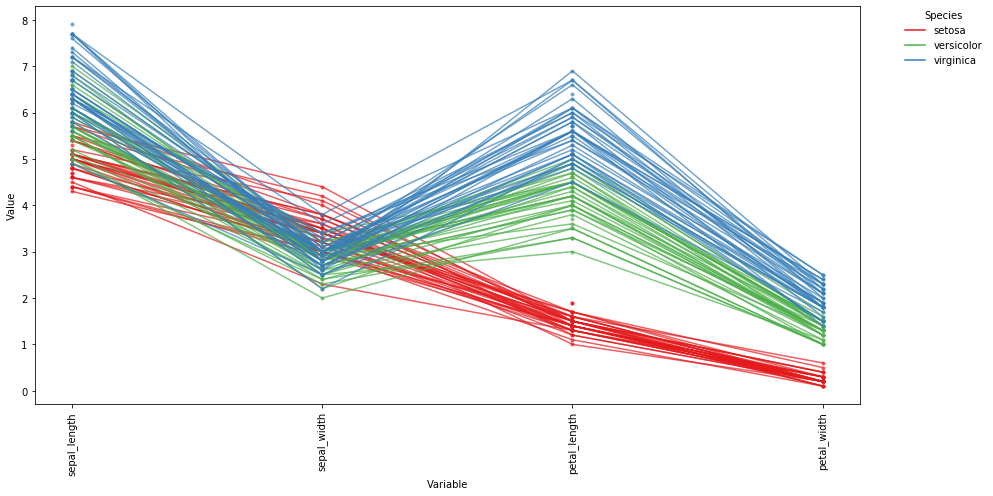

In [7]:
fig = PlotTools.spaghetti_patients(iris_df, classColumn='species', figsize=(14,7),
                       linewidth=1.5, alpha=0.7, rotationXlabels=90,
                       plotTitle=None, xTitle='Variable', yTitle='Value',
                       ylim=None, showLegend=True, saveFullPath=None,
                       marker='o', markersize=4, legend_title='Species',
                       cmap='Set1', shuffle_colors=False)

### parallele_coordinates_plot function

In this plot, the markers can be removed (by the plot_markers parameter). However, please notice that in such case, if there are missing values, they might not be shown (depending on whether the sample has values for the surrounding variables or not).

In [8]:
help(PlotTools.parallele_coordinates_plot)

Help on function parallele_coordinates_plot in module PlotTools:

parallele_coordinates_plot(df, class_column=None, cmap='Set1', figsize=(8, 5), x_title='', y_title='', axis_title_fontsize=13, plot_markers=True, marker_size=25, marker_type='o', marker_alpha=0.7, marker_linewidth=0, line_alpha=0.7, legend_title='', legend_frameon=False, xticks_rotation=0, y_gridlines=True)
    Plots a parallele coordinates plot from a pandas.DataFrame columns.
    Class column, if given, will be used to color the lines according to the class.
    Can also add markers - can be important when there are many missing data points.
    
    :param df: pandas.DataFrame. Each column will get an x axis value in the plot.
    :param class_column: string. df column name, of a column with categorical/discrete values.
                         If given, will be used to color the lines according to the class
    :param cmap: string. matplotlib cmap name. Will be used for the class column coloring
    :param figsize: t

#### Markers on

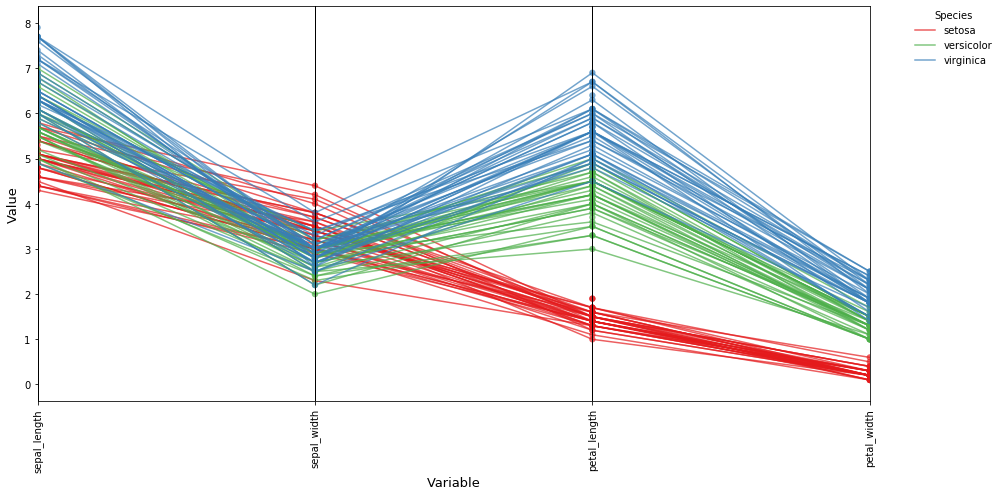

In [9]:
ax = PlotTools.parallele_coordinates_plot(iris_df, class_column='species', cmap='Set1',
                                     figsize=(14,7), x_title='Variable', y_title='Value', 
                                     axis_title_fontsize=13,
                                     plot_markers=True, marker_size=40, marker_type='o',
                                     marker_alpha=0.7, marker_linewidth=0,
                                     line_alpha=0.7, legend_title='Species',
                                     legend_frameon=False, xticks_rotation=90,
                                     y_gridlines=False)

#### Markers off 
(notice some values are not shown!)

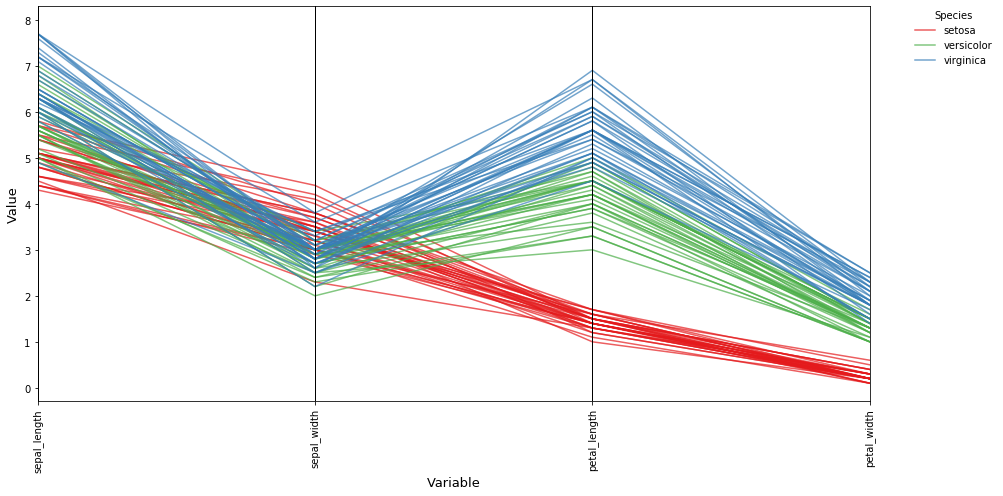

In [10]:
ax = PlotTools.parallele_coordinates_plot(iris_df, class_column='species', cmap='Set1',
                                     figsize=(14,7), x_title='Variable', y_title='Value', 
                                     axis_title_fontsize=13,
                                     plot_markers=False, marker_size=40, marker_type='o',
                                     marker_alpha=0.7, marker_linewidth=0,
                                     line_alpha=0.7, legend_title='Species',
                                     legend_frameon=False, xticks_rotation=90,
                                     y_gridlines=False)

# Boxplot

In [11]:
help(PlotTools.plot_boxplot)

Help on function plot_boxplot in module PlotTools:

plot_boxplot(seriesX, seriesY, seriesHue=None, stripplot=True, boxplot=True, saveFolder=None, ax=None, figsize=(7, 6), showf=False, plotTitle='', xTitle='', yTitle='', xRotation=45, titleFontSize=18, titleColor='maroon', legendTitle='', font_scale=1, snsStyle='ticks', boxTransparency=0.6, jitter=0.15, stripplot_alpha=0.7, stripplot_size=4, stripplot_color=None, linewidth=0, stripplot_palette=None, palette=None, order=None, xy_title_fontsize=14, boxplot_color=None, add_mean=False, mean_marker='_', mean_color='red', mean_size=100, mean_linewidth=3, mean_alpha=1, hide_indices_in_stripplot=None, horizontal=False)
    # still needs fixing the hue in str
    # former plotBoxplot



#### Boxplot with data points (stripplot) - default values

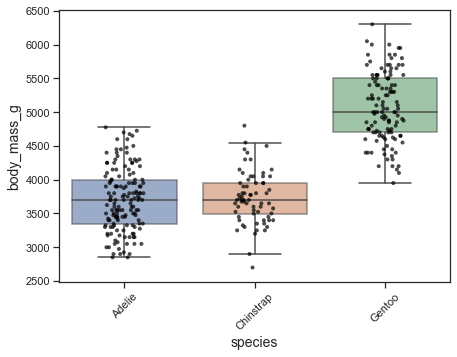

In [12]:
PlotTools.plot_boxplot(peng_df["species"], # x values series
                       peng_df["body_mass_g"], # y values series
                       figsize=(7, 5))

#### Boxplot with data points (stripplot) + mean + change x order + some different styling

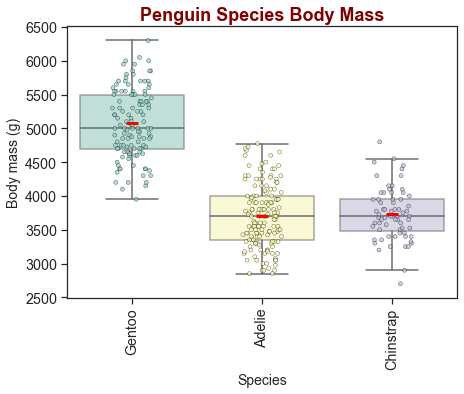

In [13]:
PlotTools.plot_boxplot(peng_df["species"], # x values series
             peng_df["body_mass_g"], # y values series
             figsize=(7, 5), palette='Set3',
             plotTitle='Penguin Species Body Mass', 
             xTitle='Species', 
             yTitle='Body mass (g)',
             xRotation=90, 
             font_scale=1.3,
             order=['Gentoo', 'Adelie', 'Chinstrap'], 
             linewidth=0.4,
             add_mean=True,
             mean_size=150)

#### Only stripplot + mean

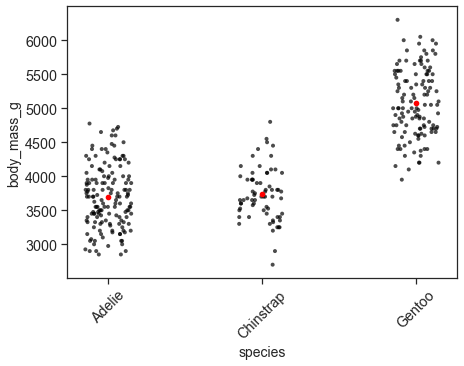

In [14]:
PlotTools.plot_boxplot(peng_df["species"], # x values series
             peng_df["body_mass_g"], # y values series
             figsize=(7, 5), boxplot=False,
             font_scale=1.3,
             add_mean=True, mean_marker='o',
             mean_size=7)

#### Boxplot with data points (stripplot) + hue (category)
add_mean is currently not working with hue.

D:\Liel\anaconda3\envs\tcr2\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


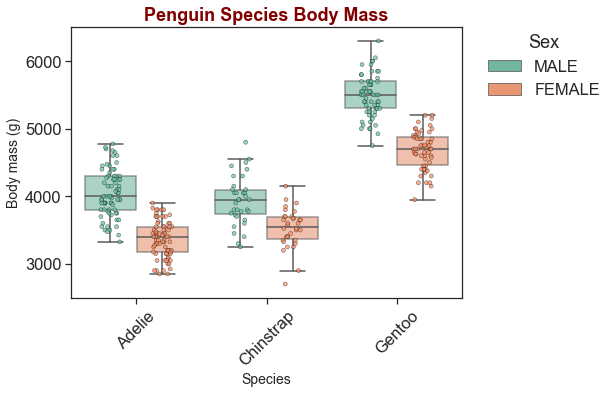

In [15]:
PlotTools.plot_boxplot(peng_df["species"], # x values series
             peng_df["body_mass_g"], # y values series
             seriesHue=peng_df["sex"],
             figsize=(7, 5), palette='Set2',
             plotTitle='Penguin Species Body Mass', 
             xTitle='Species', 
             yTitle='Body mass (g)',
             legendTitle='Sex',
             font_scale=1.5,
             linewidth=0.4)

# Scatterplot with correlation

In [16]:
help(PlotTools.plot_scatter)

Help on function plot_scatter in module PlotTools:

plot_scatter(x_series, y_series, ax=None, figsize=(6, 5), show_reg_line=True, plt_corr_txt=True, plot_pearson=True, plot_spearman=True, plot_title='', x_title='', y_title='', font_scale=1, sns_style='ticks', markers_color='teal', markers_alpha=0.6, x_rotation=45, title_font_size=18, corr_font_size=14, title_color='maroon', xticks=None, axes_title_font_size=14, x_jitter=None, y_jitter=None, ylim=None, correl_text_x_loc=0.2, correl_text_y_loc=0.96, save_folder=None, save_full_path=None)
    @param x_series: pd.Series. x values series.
    @param y_series: pd.Series. y values series.
    @param ax: matplotlib axes object to plot over. Default None
    @param figsize: tuple (length 2) with numbers indicating figure size. Default (6, 5)
    @param show_reg_line: boolean. Whether to add a regression line. Default True
    @param plt_corr_txt: boolean. Whether to add correlation text. Default True
    @param plot_pearson: boolean. Whether to

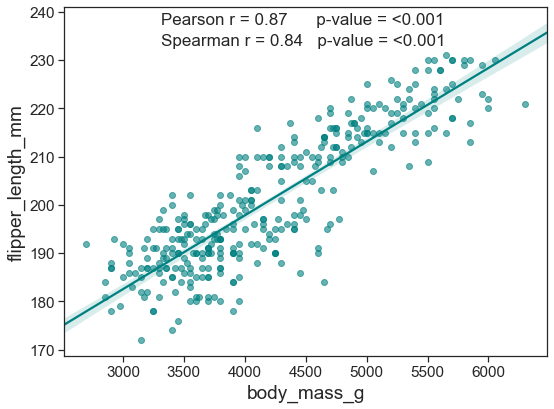

In [18]:
PlotTools.plot_scatter(peng_df["body_mass_g"], # x series
                       peng_df["flipper_length_mm"], # y series
                       figsize=(8, 6),
                       x_rotation=0, 
                       corr_font_size=17, font_scale=1.4,
                       axes_title_font_size=19,
                       correl_text_x_loc=0.2, correl_text_y_loc=0.95)

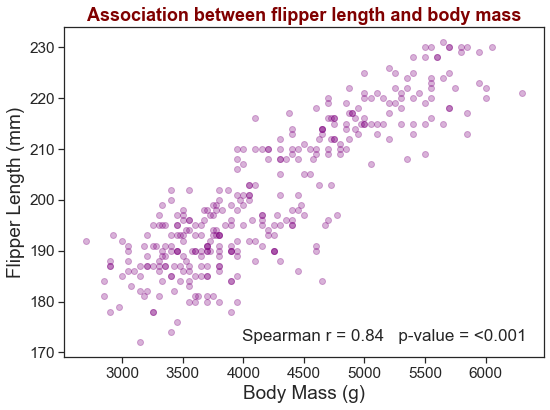

In [29]:
PlotTools.plot_scatter(peng_df["body_mass_g"], # x series
                       peng_df["flipper_length_mm"], # y series
                       figsize=(8, 6),
                       show_reg_line=False, plot_pearson=False,
                       plot_title='Association between flipper length and body mass',
                       x_title='Body Mass (g)',
                       y_title='Flipper Length (mm)',
                       markers_color='purple', markers_alpha='0.3',
                       x_rotation=0, 
                       corr_font_size=17, font_scale=1.4,
                       axes_title_font_size=19,
                       correl_text_x_loc=0.37, correl_text_y_loc=0.05)